# Credit_card_fruad_detection

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.model_selection import train_test_split  # For splitting the data into training and testing sets
from sklearn.metrics import accuracy_score  # For evaluating the model's accuracy
from sklearn.preprocessing import StandardScaler  # For standardizing the features
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sea  # For enhanced data visualizations

In [10]:
df=pd.read_csv("credit_data.csv") # Load the dataset into a DataFrame

In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
df.shape #gives shape of the data

(284807, 31)

In [13]:
df["Class"].value_counts()
# 0 has more number than the 1 value which is imbalaced data

Class
0    284315
1       492
Name: count, dtype: int64

In [14]:
non_fruad=df[df["Class"]==0] # assigning 0 to the non-fruad
fruad=df[df["Class"]==1]     # assigning 1 to the fruad

In [15]:
#lets make the class 0 to have 492 random values instead of 284315 values
class1=non_fruad.sample(n=492)

In [16]:
class1.shape

(492, 31)

In [17]:
df_new=pd.concat([class1,fruad],axis=0) # add the data to rows so axis is equal to 0
df_new

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
45804,42502.0,1.420931,-1.115408,0.412654,-1.477161,-1.370629,-0.241792,-1.128992,0.073595,-2.005535,...,-0.139332,-0.057085,0.054567,-0.010998,0.259415,-0.192741,0.036871,0.007103,20.00,0
5885,6429.0,1.306629,-0.750210,0.387309,-1.370992,-1.389608,-1.137745,-0.705479,-0.098966,1.485590,...,-0.519694,-0.882602,0.069458,0.360667,0.334239,-0.798334,0.024123,0.013699,28.60,0
13555,24041.0,1.545337,-1.243784,-0.638754,-2.286134,0.758203,3.505092,-1.914447,0.772998,-0.452820,...,-0.259913,-0.248572,-0.030393,0.936523,0.476671,-0.127530,0.026747,0.015300,18.40,0
204388,135255.0,-0.433360,1.208336,0.372797,0.332873,1.202976,-0.899687,1.754186,-0.401356,-0.979556,...,0.148917,0.578967,-0.399785,0.029028,0.591456,-0.488130,0.106647,0.126878,29.23,0
273790,165701.0,2.122316,-0.962503,-2.525940,-1.676110,1.626630,3.408812,-1.529461,0.941478,-0.095372,...,0.238221,0.661569,0.142103,0.604128,-0.112563,-0.067314,0.048173,-0.017584,19.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [18]:
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
45804,42502.0,1.420931,-1.115408,0.412654,-1.477161,-1.370629,-0.241792,-1.128992,0.073595,-2.005535,...,-0.139332,-0.057085,0.054567,-0.010998,0.259415,-0.192741,0.036871,0.007103,20.00,0
5885,6429.0,1.306629,-0.750210,0.387309,-1.370992,-1.389608,-1.137745,-0.705479,-0.098966,1.485590,...,-0.519694,-0.882602,0.069458,0.360667,0.334239,-0.798334,0.024123,0.013699,28.60,0
13555,24041.0,1.545337,-1.243784,-0.638754,-2.286134,0.758203,3.505092,-1.914447,0.772998,-0.452820,...,-0.259913,-0.248572,-0.030393,0.936523,0.476671,-0.127530,0.026747,0.015300,18.40,0
204388,135255.0,-0.433360,1.208336,0.372797,0.332873,1.202976,-0.899687,1.754186,-0.401356,-0.979556,...,0.148917,0.578967,-0.399785,0.029028,0.591456,-0.488130,0.106647,0.126878,29.23,0
273790,165701.0,2.122316,-0.962503,-2.525940,-1.676110,1.626630,3.408812,-1.529461,0.941478,-0.095372,...,0.238221,0.661569,0.142103,0.604128,-0.112563,-0.067314,0.048173,-0.017584,19.95,0


In [19]:
df_new["Class"].value_counts()
# now the data is same which is not imbalance

Class
0    492
1    492
Name: count, dtype: int64

In [20]:
df_new.reset_index(inplace=True,drop=True)   # resetting the index
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,42502.0,1.420931,-1.115408,0.412654,-1.477161,-1.370629,-0.241792,-1.128992,0.073595,-2.005535,...,-0.139332,-0.057085,0.054567,-0.010998,0.259415,-0.192741,0.036871,0.007103,20.00,0
1,6429.0,1.306629,-0.750210,0.387309,-1.370992,-1.389608,-1.137745,-0.705479,-0.098966,1.485590,...,-0.519694,-0.882602,0.069458,0.360667,0.334239,-0.798334,0.024123,0.013699,28.60,0
2,24041.0,1.545337,-1.243784,-0.638754,-2.286134,0.758203,3.505092,-1.914447,0.772998,-0.452820,...,-0.259913,-0.248572,-0.030393,0.936523,0.476671,-0.127530,0.026747,0.015300,18.40,0
3,135255.0,-0.433360,1.208336,0.372797,0.332873,1.202976,-0.899687,1.754186,-0.401356,-0.979556,...,0.148917,0.578967,-0.399785,0.029028,0.591456,-0.488130,0.106647,0.126878,29.23,0
4,165701.0,2.122316,-0.962503,-2.525940,-1.676110,1.626630,3.408812,-1.529461,0.941478,-0.095372,...,0.238221,0.661569,0.142103,0.604128,-0.112563,-0.067314,0.048173,-0.017584,19.95,0


In [21]:
df_new.shape

(984, 31)

In [22]:
df_new.describe()   # give full info of the dataframe

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,87837.852642,-2.408058,1.809234,-3.529494,2.267609,-1.563709,-0.683614,-2.789456,0.291760,-1.281149,...,0.363857,0.015917,-0.011822,-0.034513,0.012008,0.012519,0.083528,0.038898,108.115142,0.500000
std,48463.625580,5.501343,3.686634,6.222445,3.216109,4.218919,1.789581,5.851655,4.880383,2.320363,...,2.799510,1.163630,1.185906,0.563503,0.674655,0.469265,0.998182,0.420699,233.517261,0.500254
min,406.000000,-30.552380,-8.850043,-31.103685,-4.861632,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.727935,-4.781606,-1.155536,-7.263482,-1.898323,0.000000,0.000000
25%,45560.500000,-2.975485,-0.119515,-5.084967,-0.082872,-1.835144,-1.599839,-3.103817,-0.175540,-2.298358,...,-0.152313,-0.531664,-0.226308,-0.389745,-0.329096,-0.301826,-0.065450,-0.055335,1.180000,0.000000
50%,80130.000000,-0.884501,0.940370,-1.353246,1.307692,-0.441015,-0.651727,-0.701650,0.165418,-0.684738,...,0.153340,0.039953,-0.031922,0.011384,0.053473,-0.030612,0.053089,0.036239,19.985000,0.500000
75%,134778.000000,0.988159,2.845852,0.312435,4.295985,0.513201,0.092986,0.289860,0.853411,0.196415,...,0.651412,0.564606,0.202603,0.390235,0.393071,0.325954,0.455031,0.219599,99.990000,1.000000
max,171956.000000,2.262613,22.057729,3.167211,12.114672,11.095089,6.474115,5.802537,20.007208,4.572081,...,27.202839,8.361985,5.466230,1.199925,2.208209,2.745261,3.052358,1.854955,2563.160000,1.000000


In [23]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    float64
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     984 non-null    float64
 11  V11     984 non-null    float64
 12  V12     984 non-null    float64
 13  V13     984 non-null    float64
 14  V14     984 non-null    float64
 15  V15     984 non-null    float64
 16  V16     984 non-null    float64
 17  V17     984 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64
 22  V2

In [24]:
df_new.isna().sum()   #check for any null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

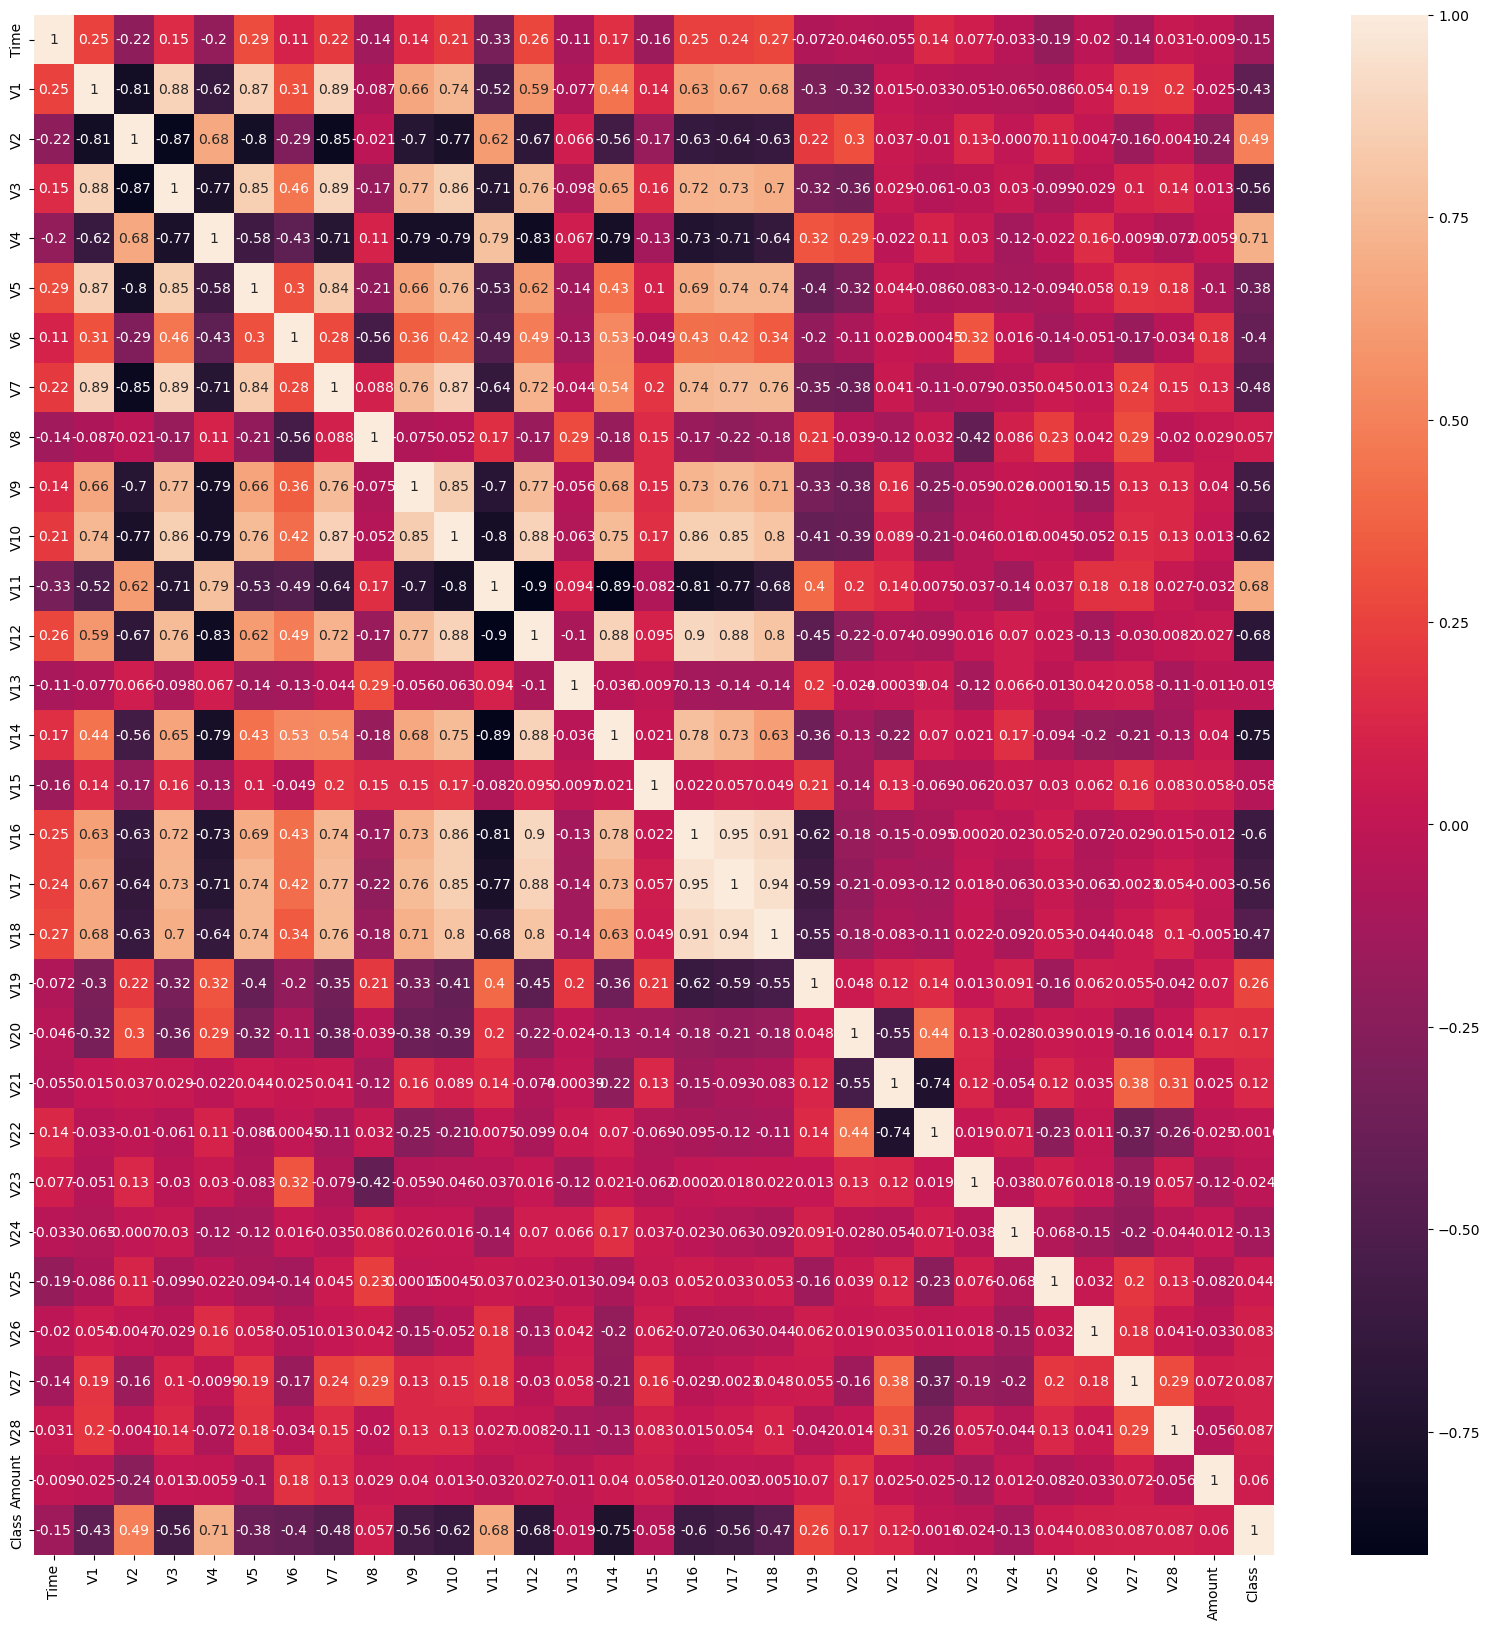

In [25]:
# Calculate the correlation matrix for the DataFrame
correlation = df_new.corr()  # Computes the pairwise correlation of columns in the DataFrame 'df_new'

# Create a figure for the heatmap with a specified size
plt.figure(figsize=(20, 20))  # Sets the figure size to 20x20 inches for better readability of the heatmap

# Generate a heatmap to visualize the correlation matrix
sea.heatmap(correlation, annot=True)  # Creates a heatmap with annotations (correlation values) displayed on the heatmap

# Display the heatmap
plt.show()  # Renders the heatmap on the screen


In [32]:
# Split the data into features (X) and target (y)
x=df_new.iloc[:,:-1]
y=df_new["Class"]

In [33]:
# Standardize the feature columns
scaler=StandardScaler()

In [34]:
scaler.fit(x)

StandardScaler()

In [35]:
x=scaler.transform(x)

In [36]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=5)
x_train.shape,x_test.shape

((787, 30), (197, 30))

In [37]:
# Initialize the Logistic Regression model
lr=LogisticRegression()

In [38]:
lr.fit(x_train,y_train)

LogisticRegression()

In [39]:
# Calculate the accuracy of the model
pred_xtrain=lr.predict(x_train)
accuracy_xtrain=accuracy_score(pred_xtrain,y_train)
print("The xtrain accuracy score is",accuracy_xtrain)

The xtrain accuracy score is 0.9453621346886912


In [40]:
pred_xtest=lr.predict(x_test)
accuracy_xtest=accuracy_score(pred_xtest,y_test)
print("The xtrain accuracy score is",accuracy_xtest)

The xtrain accuracy score is 0.9238578680203046


In [43]:
# Define a new input data point as a tuple
input_data = (472, -3.043540624, -3.157307121, 1.08846278, 2.288643618, 1.35980513, -1.064822523, 
              0.325574266, -0.067793653, -0.270952836, -0.838586565, -0.414575448, -0.50314086, 
              0.676501545, -1.692028933, 2.000634839, 0.666779696, 0.599717414, 1.725321007, 
              0.28334483, 2.102338793, 0.661695925, 0.435477209, 1.375965743, -0.293803153, 
              0.279798032, -0.145361715, -0.252773123, 0.035764225, 529)

# Convert the input data tuple to a NumPy array
temp = np.array(input_data)
test=

# Reshape the NumPy array to match the expected input shape for the model (1 sample, n features)
temp = temp.reshape(1, -1)

# Use the logistic regression model to make a prediction on the reshaped input data
temp = lr.predict(temp)

# Print the predicted value (1 or 0)
print(temp)

# Check the predicted value and print whether it is classified as "Fraud" or "Not a Fraud"
if temp == 1:
    print("Fraud")
else:
    print("Not a Fraud")



[1]
Fraud
